In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j

custom jupyter library imported


In [2]:
def thresh(a, key):
    a = np.array(a[key])
#     if key == 'Signal power':
#         return a > -1300
    if key == 'SNR':
        return a > -200
    if key == 'txTime':
        return a < 200000
    if key == 'energy':
        return a < 100000
    if key == 'TX power':
        return a > -1000
    if key == 'EARFCN':
        return a < 10000
    if key == 'PCI':
        return a < 1000
    if key == 'RSRQ':
        return a > -1000
    return a == a

def dict_filt(dc, x, y):
    t = thresh(dc, x)
    p = np.array(dc[x])[t]
    q = np.array(dc[y])[t]
    # print('dc[x]', x, len(dc[x]), 'dc[y]', y, len(dc[y]), dc[x], dc[y]) 
    # print('p', len(p), 'q', len(q), 'tx', p, q, t,)
    t = thresh(dc, y)
    # print('p[t]', len(p[t]), 'q[t]', len(q[t]), p[t], q[t], 'ty', t)
    # print()
    return p[t], q[t]

def plot(x, y, xr, yr, files, colour):
    for f in files:
        zu_mg = j.merge(j.mk(f))
        p, q = dict_filt(zu_mg, x, y)
        if len(p) and len(q):
            plt.plot(p/xr, q/yr, colour)

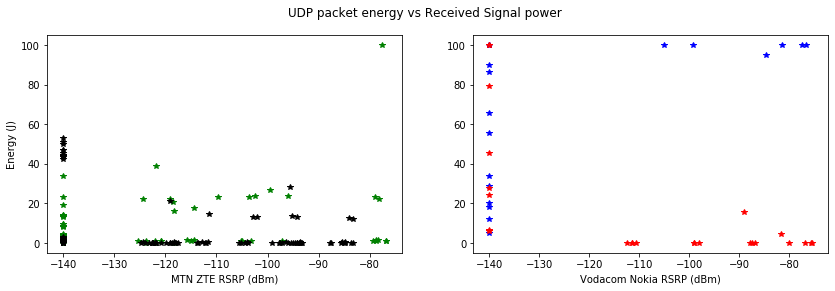

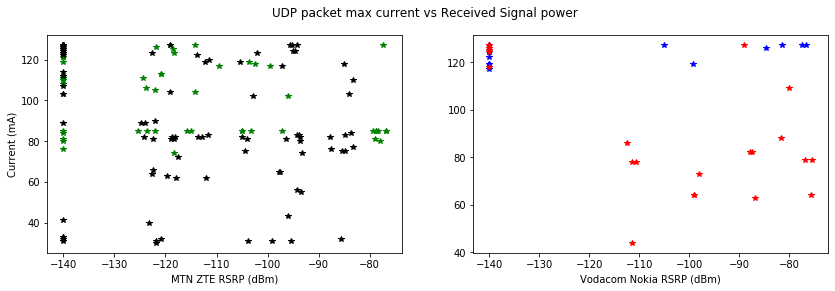

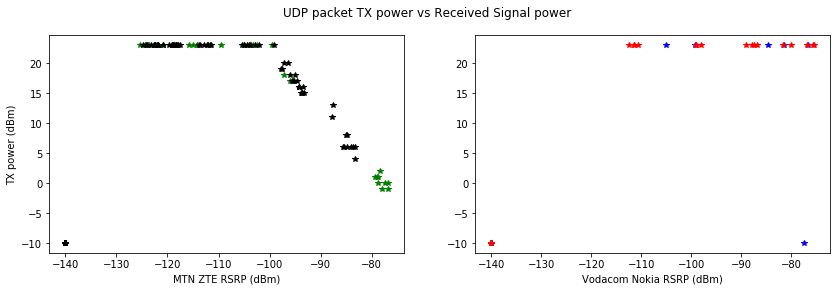

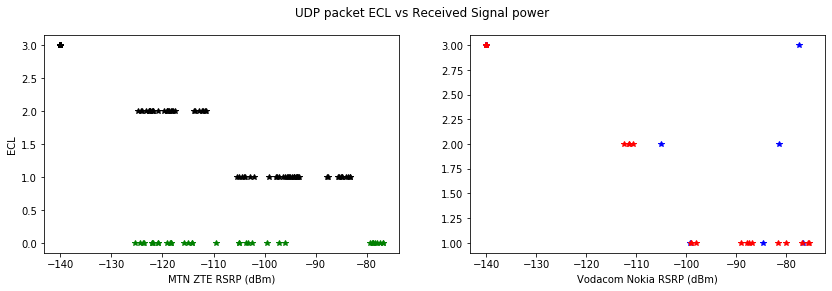

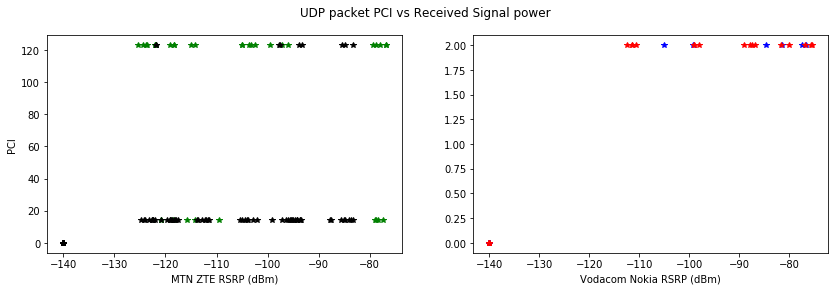

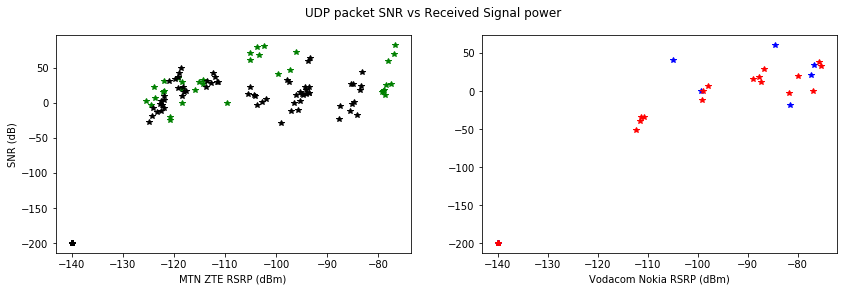

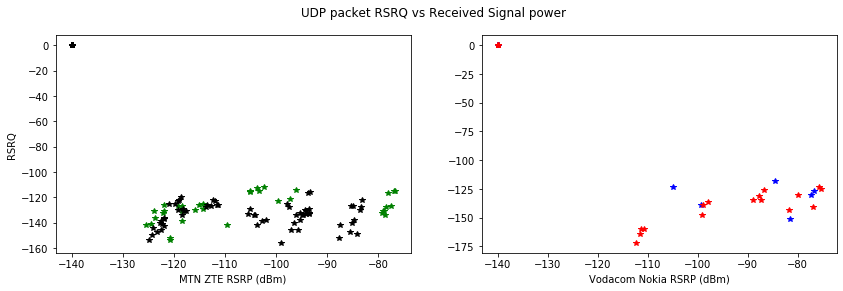

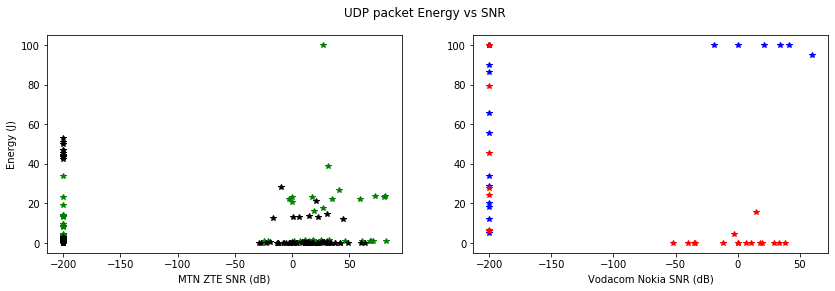

In [3]:
def plot(x, y, xr, yr, files, colour):
    for f in files:
        zu_mg = j.merge(j.mk(f))
        if zu_mg:
            plt.plot(np.array(zu_mg[x])/xr, np.array(zu_mg[y])/yr, colour)
            
def compare_ue(text, ylabel, xlabel, ky, kx, ry, rx):
    fx = 14
    fy = 4
    sx = 1
    sy = 2
    j.debug = False
    plt.figure(figsize=(fx, fy))
    plt.suptitle(text)

    plt.subplot(sx, sy, 1)
    plt.xlabel('Ublox ' + xlabel)
    plt.ylabel(ylabel)
    j.dirr = 'logs/zte_mtn/rf_shield/ublox/'
    plot(kx, ky, rx, ry, files, 'g*')
    j.dirr = 'logs/nokia_vodacom/centurycity/ublox/'
    plot(kx, ky, rx, ry, files, 'b*')

    plt.subplot(sx, sy, 2)
    plt.xlabel('Quectel ' + xlabel)
    j.dirr = 'logs/zte_mtn/rf_shield/quectel/'
    plot(kx, ky, rx, ry, files, 'k*')
    j.dirr = 'logs/nokia_vodacom/centurycity/quectel/'
    plot(kx, ky, rx, ry, files, 'r*')

    plt.savefig('img/vodacom_vs_mtn_ue' + "_".join(text.split()) + '.png')
    plt.show()
    
def compare_nw(text, ylabel, xlabel, ky, kx, ry, rx):
    fx = 14
    fy = 4
    sx = 1
    sy = 2
    j.debug = False
    plt.figure(figsize=(fx, fy))
    plt.suptitle(text)

    plt.subplot(sx, sy, 1)
    plt.xlabel('MTN ZTE ' + xlabel)
    plt.ylabel(ylabel)
    j.dirr = 'logs/zte_mtn/rf_shield/ublox/'
    plot(kx, ky, rx, ry, files, 'g*')
    j.dirr = 'logs/zte_mtn/rf_shield/quectel/'
    plot(kx, ky, rx, ry, files, 'k*')

    plt.subplot(sx, sy, 2)
    plt.xlabel('Vodacom Nokia ' + xlabel)
    
    j.dirr = 'logs/nokia_vodacom/centurycity/ublox/'
    plot(kx, ky, rx, ry, files, 'b*')
    j.dirr = 'logs/nokia_vodacom/centurycity/quectel/'
    plot(kx, ky, rx, ry, files, 'r*')
    plt.savefig('img/vodacom_vs_mtn_nw' + "_".join(text.split()) + '.png')
    plt.show()
    
def compare(text, ylabel, xlabel, ky, kx, ry, rx):
    # compare_ue(text, ylabel, xlabel, ky, kx, ry, rx)
    compare_nw(text, ylabel, xlabel, ky, kx, ry, rx)
    
# files = ['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*']
# files = ['release/releaseset/*', 'drx/set/*', 'echo/set/*', 'ptau/set/*']
files = ['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*']
compare('UDP packet energy vs Received Signal power', 'Energy (J)', 'RSRP (dBm)', 'energy', 'Signal power', 1000, 10)
compare('UDP packet max current vs Received Signal power', 'Current (mA)', 'RSRP (dBm)', 'maxCurrent', 'Signal power', 1, 10)
compare('UDP packet TX power vs Received Signal power', 'TX power (dBm)', 'RSRP (dBm)', 'TX power', 'Signal power', 10, 10)
compare('UDP packet ECL vs Received Signal power', 'ECL', 'RSRP (dBm)', 'ECL', 'Signal power', 1, 10)
compare('UDP packet PCI vs Received Signal power', 'PCI', 'RSRP (dBm)', 'PCI', 'Signal power', 1, 10)
compare('UDP packet SNR vs Received Signal power', 'SNR (dB)', 'RSRP (dBm)', 'SNR', 'Signal power', 1, 10)
compare('UDP packet RSRQ vs Received Signal power', 'RSRQ', 'RSRP (dBm)', 'RSRQ', 'Signal power', 1, 10)
compare('UDP packet Energy vs SNR', 'Energy (J)', 'SNR (dB)', 'energy', 'SNR', 1000, 1)